In [ ]:
'''
Homework 6
Name: Austin Ramsey
ID: 000749074
LTU Honor Code: “I have neither given nor received any unauthorized aid in completing this work, nor have I presented someone else's work as my own.”

'''

"\nHomework 6\nName: Austin Ramsey\nID: 000749074\nLTU Honor Code: “I have neither given nor received any unauthorized aid in completing this work, nor have I presented someone else's work as my own.”\n\n"

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import io

heart_disease_data = pd.read_csv(io.BytesIO(uploaded['heart_cleveland_upload.csv']))

In [ ]:
NumTrain = int(heart_disease_data.shape[0])

# Split into X and y datasets from 
X = heart_disease_data.to_numpy()[:NumTrain, 0:13]
y = heart_disease_data.to_numpy()[:NumTrain, 13]

from sklearn.model_selection import train_test_split
# Split dataset into train and test - 75% and 25% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

# Print to ensure each dataset is the right shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(222, 13)
(222,)
(75, 13)
(75,)


In [ ]:
from keras import models
from keras import layers
from keras.layers import Dense

# create the model
def build_model():
    model = models.Sequential()
    model.add(Dense(512, input_dim=13, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    return model

In [ ]:
k = 3
num_val_samples = len(X_train) // k
num_epochs = 125
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets, # Train
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    # Print accuracy
    accuracy = history.history['acc']
    print('Model Accuracy: ', accuracy[1])
    # Evaluate the mae history of the model
    #mae_history = history.history['val_mae'] # print(history.history.keys())
    #all_mae_histories.append(mae_history) # for MAE graph. Need to cal. avg

processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print(len(average_mae_history)) # num of epochs

125


In [ ]:
# Replace each point with an exponential moving average of the previous points,
# to obtain a smooth curve
# define smooth_curve function for graphing
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

# Smooth and plot mae history
#smooth_mae_history = smooth_curve(average_mae_history[10:]) # Omit the first 10 data points, 
                                 # which are on a different scale from the rest of the curve.

#plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
#plt.xlabel('Epochs')
#plt.ylabel('Validation MAE')
#plt.show()

In [ ]:
# Get a fresh, compiled model 
model = build_model()
# Train it on the entirety of the data for 125 epochs
model.fit(X_train, y_train,
          epochs=125, batch_size=16, verbose=0) # using 80 as no. of epochs
# Evaluate the model with test data
test_acc = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.4267 - acc: 0.8267


In [ ]:
# Print model accuracy from test data evaluation
print('Model Accuracy: ', test_acc[1]*100, '%')

Model Accuracy:  82.66666531562805 %


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


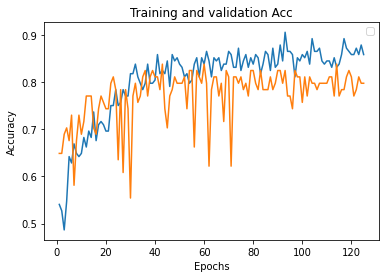

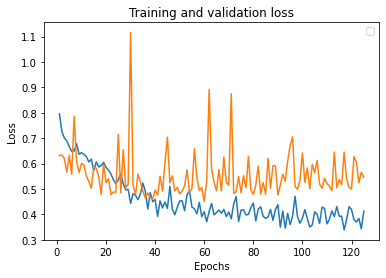

In [ ]:
# Print the unsmoothed training and validation accuracy and loss graphs
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(acc) + 1), acc)
plt.plot(range(1, len(val_acc) + 1), val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(range(1, len(loss) + 1), loss)
plt.plot(range(1, len(val_loss) + 1), val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

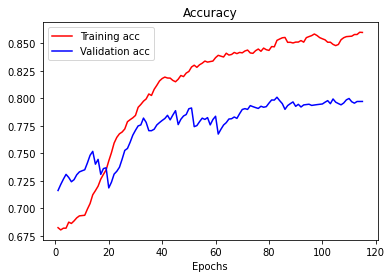

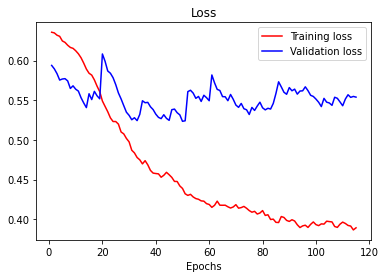

<Figure size 432x288 with 0 Axes>

In [ ]:
# Print the smoothed training and validation accuracy and loss graphs
smooth_acc = smooth_curve(acc[10:])
smooth_val_acc = smooth_curve(val_acc[10:])
smooth_loss = smooth_curve(loss[10:])
smooth_val_loss = smooth_curve(val_loss[10:])

#Create the plot for Accuracy
plt.plot(range(1, len(smooth_acc) + 1), smooth_acc, 'r', label='Training acc')
plt.plot(range(1, len(smooth_val_acc) + 1), smooth_val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend()
plt.figure()
#Create the plot for Loss
plt.plot(range(1, len(smooth_loss) + 1), smooth_loss, 'r', label='Training loss')
plt.plot(range(1, len(smooth_val_loss) + 1), smooth_val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.figure()
plt.show()

# Summary/Analysis

I started by increasing the number of epochs to 500, which resulted in accuracy starting around 45%. I used the MAE history graph and the validation accuracy and loss graphs to determine the range of epochs I needed to use, which ended up around 125 resulting in 80%+ accuracy. The graphs for training and validation accuracy and loss can be seen above, as well as the test accuracy of 82.67%. Initially I had added a dropout layer for overfitting, but that ended up decreasing the training and validation accuracy. After removing the dropout layer I focused on soley finding the perfect number of epochs which ranged from 100-140. As mentioned, I found that the best number of epochs was 125.